<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [163]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [164]:
data = pd.read_csv("/content/abalone (3).csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [165]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [166]:
data.Rings

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [167]:
# 데이터 로드
data = pd.read_csv("/content/abalone (3).csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)
X = data.values.astype(float)

In [168]:
X

array([[0.455, 0.365, 0.095, ..., 1.   , 0.   , 0.   ],
       [0.35 , 0.265, 0.09 , ..., 1.   , 0.   , 0.   ],
       [0.53 , 0.42 , 0.135, ..., 0.   , 1.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 1.   , 0.   , 0.   ],
       [0.625, 0.485, 0.15 , ..., 0.   , 1.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 1.   , 0.   , 0.   ]])

In [169]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,False,True,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,True,False,False
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,True,False,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,False,True,False


In [170]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0,0.0,0.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0,0.0,0.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0,0.0


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [171]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [172]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.3, random_state=156)

In [173]:
X_train.shape

(2923, 10)

In [174]:
X_test.shape

(1254, 10)

In [175]:
X.shape[0]*(3/10)

1253.1

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성,평가에 필요한 모듈을 불러오세요.

In [176]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [201]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
#예측값 구하기
y_preds = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds = ridge.predict(X_test)+1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

2.1269347943222767
1.4584014517005517


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [178]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [179]:
#cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
for alpha in alphas : 
  ridge = Ridge(alpha=alpha)

  neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일때 5 folds 의 평균 RMSE: 2.242
alpha 0.1일때 5 folds 의 평균 RMSE: 2.237
alpha 1일때 5 folds 의 평균 RMSE: 2.230
alpha 10일때 5 folds 의 평균 RMSE: 2.337
alpha 100일때 5 folds 의 평균 RMSE: 2.621


alpha 1일때 5 folds 의 평균 RMSE: 2.230

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [180]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [181]:
#모델 생성 및 훈련
xgb_reg.fit(X_train, y_train)

#예측값 구하기
y_preds = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds = xgb_reg.predict(X_test)+1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

[12:08:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4.563345281490588
2.1361987925964634


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

모름

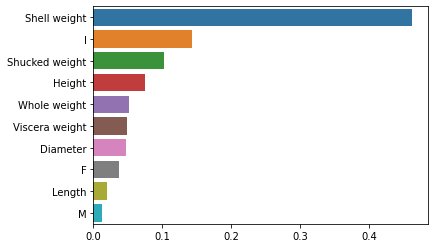

In [182]:
import seaborn as sns
%matplotlib inline

feature_series = pd.Series(data = xgb_reg.feature_importances_, index = data.columns)
feature_series = feature_series.sort_values(ascending = False) # 내림차순
sns.barplot(x = feature_series, y = feature_series.index)

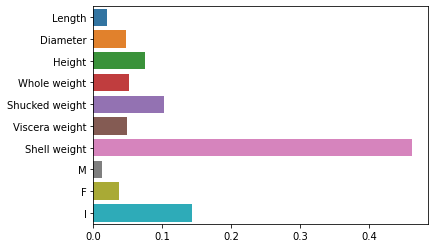

In [183]:
sns.barplot(x = xgb_reg.feature_importances_ , y = data.columns)

In [184]:
 xgb_reg.feature_importances_

array([0.0199863 , 0.04685535, 0.0744786 , 0.05217881, 0.10189312,
       0.04862583, 0.46297044, 0.01295677, 0.0367004 , 0.1433544 ],
      dtype=float32)

In [185]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

In [186]:
X_train

array([[0.66 , 0.505, 0.2  , ..., 1.   , 0.   , 0.   ],
       [0.695, 0.57 , 0.2  , ..., 1.   , 0.   , 0.   ],
       [0.695, 0.525, 0.205, ..., 0.   , 1.   , 0.   ],
       ...,
       [0.565, 0.45 , 0.16 , ..., 1.   , 0.   , 0.   ],
       [0.755, 0.575, 0.2  , ..., 0.   , 1.   , 0.   ],
       [0.41 , 0.32 , 0.095, ..., 0.   , 0.   , 1.   ]])

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [187]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [188]:
wine = load_wine()

wine_X = wine.data # x변수 
wine_y = wine.target # y변수

In [189]:
import pandas as pd

In [190]:
wine.data.shape

(178, 13)

In [191]:
wine_df = pd.DataFrame()

In [192]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [193]:
wine_df["target"]=pd.DataFrame(wine.target)
wine_df[wine.feature_names]=pd.DataFrame(wine.data)

In [194]:
wine_df

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [195]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 2) train/test 셋 분리

In [196]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.3, random_state=123)

X_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [197]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [198]:
#기울기
lr_clf.coef_

array([[-1.99751167e-01,  3.65450552e-01,  1.49472112e-01,
        -1.88027149e-01, -2.28495646e-02,  1.95456485e-01,
         4.66701265e-01, -1.66796661e-02,  8.23897101e-02,
         6.75011473e-02, -1.92621856e-02,  2.94915749e-01,
         7.42524049e-03],
       [ 5.96475829e-01, -7.88672591e-01, -1.26181429e-01,
         2.12254654e-01, -1.13504800e-02,  3.15785912e-01,
         3.55147976e-01,  3.34675580e-02,  2.79035669e-01,
        -1.17202474e+00,  2.61165677e-01,  4.64731544e-01,
        -8.33633158e-03],
       [-3.96724662e-01,  4.23222039e-01, -2.32906833e-02,
        -2.42275051e-02,  3.42000446e-02, -5.11242396e-01,
        -8.21849241e-01, -1.67878919e-02, -3.61425379e-01,
         1.10452359e+00, -2.41903492e-01, -7.59647293e-01,
         9.11091084e-04]])

In [199]:
#절편
lr_clf.intercept_

array([-0.04177837,  0.09551046, -0.05373209])

3-3) 모델의 정확도를 구하세요.

In [200]:
#모델의 예측값 구하기
lr_preds = lr_clf.predict(X_test)
lr_preds


from sklearn.metrics import accuracy_score, roc_auc_score
#모델의 정확도 구하기
print('accuracy : {0:.3f}'.format(accuracy_score(y_test,lr_preds)))

accuracy : 0.963
